In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_df.describe()

# 891 passengers were on board
# 38.38% of the people survived.
# Average age of a person was 30
# The oldest person on board was 80
# 52% had their siblings on board with them
# 38% had either their parents or childern onboard
# Avg fare paid was 32.2. However, 75% paid less than the average amount

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

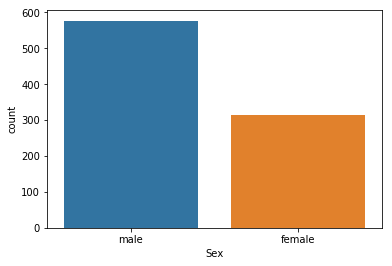

In [7]:
sns.countplot('Sex', data=titanic_df)

# There was almost twice as many men as women

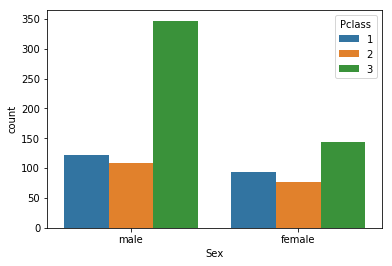

In [8]:
sns.countplot('Sex', data=titanic_df, hue='Pclass')

# Men in class 3 make up for more than 55% of the male population onboard

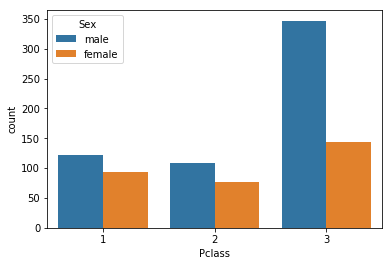

In [9]:
    sns.countplot('Pclass', data=titanic_df, hue='Sex')
    
    # Class 1 & 2 followed pretty much the same pattern

In [10]:
# The arguement has to be set equal to the data that is being used, in this case age and name are defining passengers
# Here it doesn't matter whether you specify age and sex or something else. What matters is what goes in argument list.

def male_female_child(passanger):
    age, sex = passanger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [11]:
# Even if we had specified age and name if function, providing 'Age' and 'Sex' as list (as below) yeilds same result

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [24]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [25]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

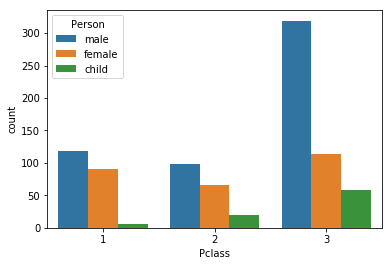

In [14]:
sns.countplot('Pclass', data=titanic_df, hue='Person')

# There were hardly any childern in the 1st class. Howerver, 3rd had many.

Text(0,0.5,'Number of Passengers')

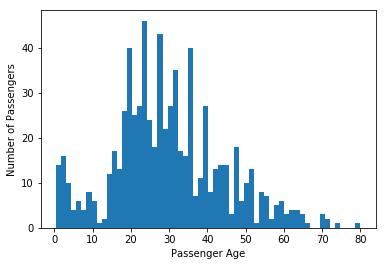

In [20]:
titanic_df['Age'].hist(bins=60,grid=False)
plt.xlabel('Passenger Age')
plt.ylabel('Number of Passengers')

# Most of the childern were minors or 14-16.
# 14-36 made up most of the passengers on board

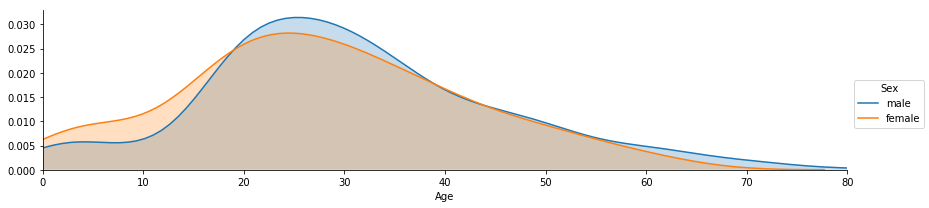

In [37]:
# To see how a particular attibute is distributed, we use the KDE plot

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

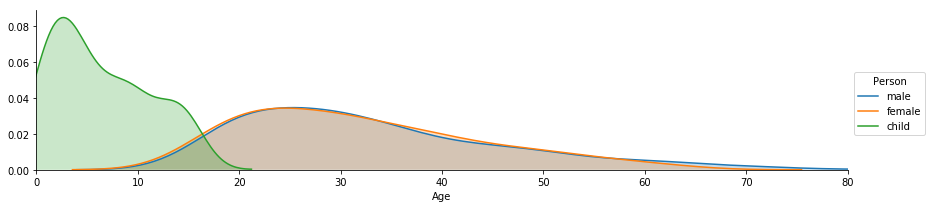

In [38]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

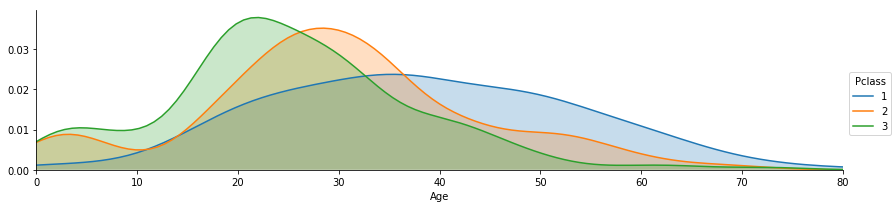

In [41]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

# 1st class had normal distrbution. However, class 2 and 3 are skewed more towards 20-30 range

In [42]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [43]:
# Majority of information in Cabin column is empty so we have to drop the empty cells
deck = titanic_df['Cabin'].dropna()

In [44]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [61]:
# The number here is irrelevant, so we need to extract the first alphabet only
# The plot in the next cell wasn't in sequence, adding the last arguement fixes the problem

levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df['Cabin'].values.sort()

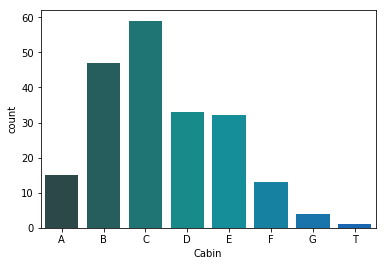

In [62]:
sns.countplot('Cabin', data=cabin_df, palette='winter_d')

In [63]:
# The cabin 'T' doesn't make sense so we need to drop that by redefining the cabin dataframe

cabin_df = cabin_df[cabin_df.Cabin != 'T']

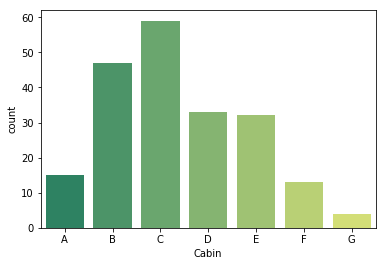

In [65]:
sns.countplot('Cabin', data=cabin_df, palette='summer')

In [66]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


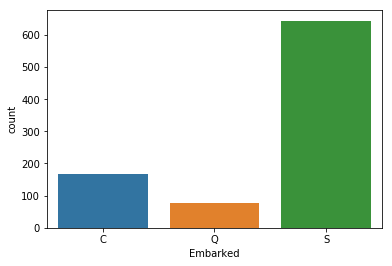

In [81]:
# Now to find the port from which passengers got on, we use the countplot again.
# C = Cherbourg, Q = Queenstown, S = Southampton

sns.countplot('Embarked', data=titanic_df, order=['C','Q','S'])

# Majority of the people embarked from Cherbourg

In [82]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

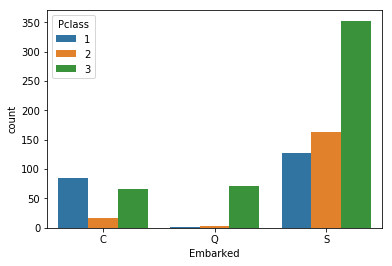

In [71]:
# To dig deeper into this information

sns.countplot('Embarked', data=titanic_df, order=['C','Q','S'], hue='Pclass')

# 50% of people who embarked from Cherbourg were in class 1
# Around 90% who embarked from Queenstown were in class 3
# Around 75% embarked from Southampton

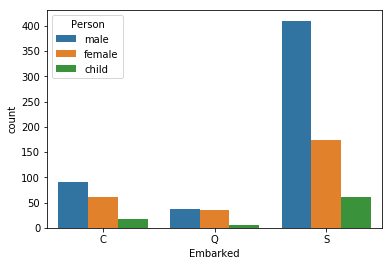

In [85]:
sns.countplot('Embarked', data=titanic_df, order=['C','Q','S'], hue='Person')

In [90]:
# Now to find who was alone and who was with family

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch 

In [99]:
# We must use the loc function if we want to change values.
# calling     titanic_df[titanic_df['Alone'] == 0]    will only filter the database and not select only the values from given column

# Below code means in the 'Alone' column in the df, find the cells where there is require value and change it

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [100]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


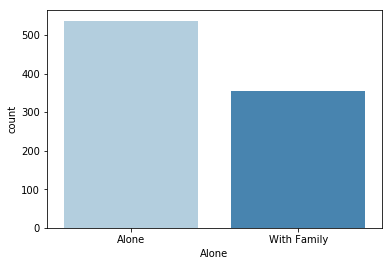

In [104]:
sns.countplot('Alone', data=titanic_df, palette='Blues', order=['Alone','With Family'])

# Majority of people were alone onboard

In [107]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

In [108]:
# Now to analyze what factors determine if a person survived

titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})

In [109]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


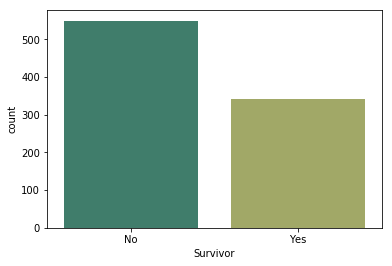

In [114]:
sns.countplot('Survivor', data=titanic_df, palette='gist_earth')

In [115]:
titanic_df.Survivor.value_counts()

No     549
Yes    342
Name: Survivor, dtype: int64

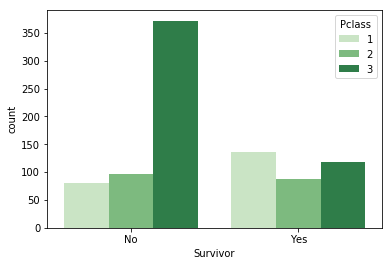

In [128]:
# Now that we know how many people survived, we can further investigate factors

sns.countplot('Survivor', data=titanic_df, hue='Pclass', palette='Greens')

# The percentage of people surviving in calss 1 is higher than 2 which is higher compared to class 3

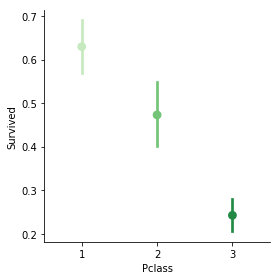

In [134]:
# This can be seen using factorplot too

sns.factorplot('Pclass', 'Survived', data=titanic_df, palette='Greens')

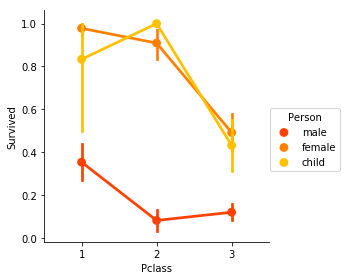

In [137]:
# To see how gender affects the survival rate
sns.factorplot('Pclass', 'Survived', hue='Person', data=titanic_df, palette='autumn')

# Almost all the females and kid from class 1 and class 2 survived. Their percentage of survial was close to 50% in class 3
# Although % of men surviving is very low, their survival rate is much higer in class 1

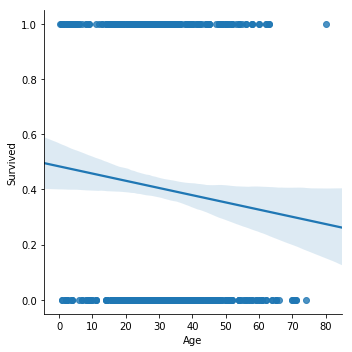

In [138]:
# To dig deeper on factors

sns.lmplot('Age','Survived', data=titanic_df)

# Younger passenger had beter chances of survival

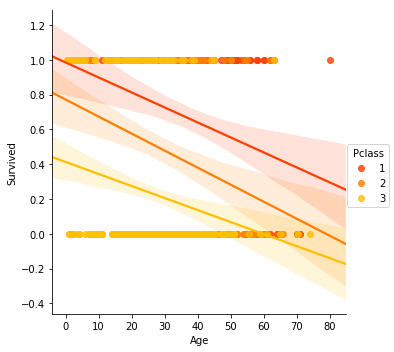

In [143]:
sns.lmplot('Age','Survived', data=titanic_df, hue='Pclass', palette='autumn')

# Again this shows deaths in 3rd class were much higher

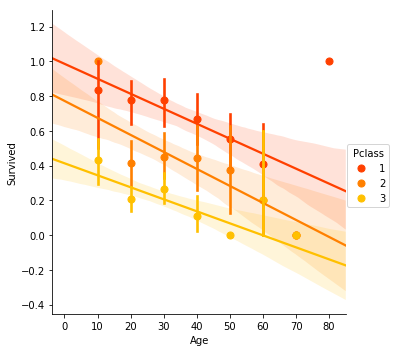

In [145]:
# Above plot has too much details, to simplify it we can divide the data in bins
generations = [10, 20, 30, 40, 50, 60, 70, 80]

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='autumn', x_bins=generations)

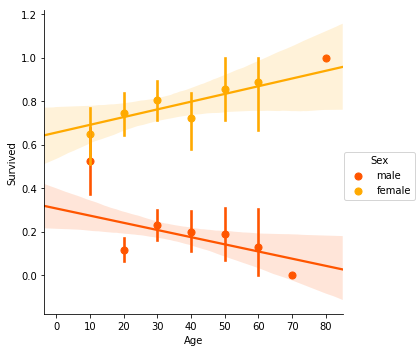

In [146]:
# Now we can use the gender to determine their likelihood of survival

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex', palette='autumn', x_bins=generations)

# Older females had better chances of survival, whereas the trend was opposite for male

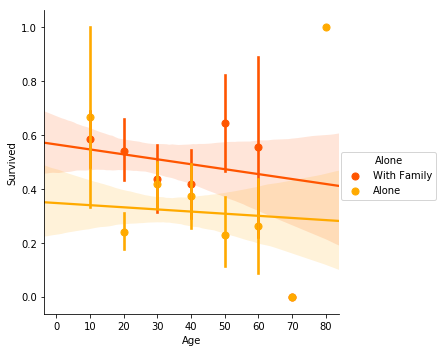

In [188]:
# To determine if them being alone or with family had any effect

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Alone', palette='autumn', x_bins=generations)

# People with family had a higher chance of survival

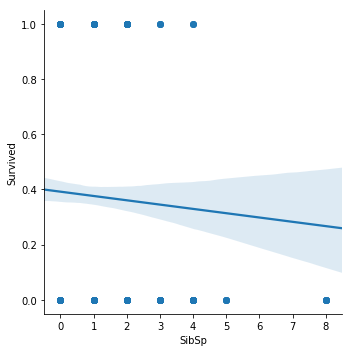

In [197]:
sns.lmplot('SibSp', 'Survived', data=titanic_df, palette='autumn')

# Greater numer of siblings on board reduced the chances of survial

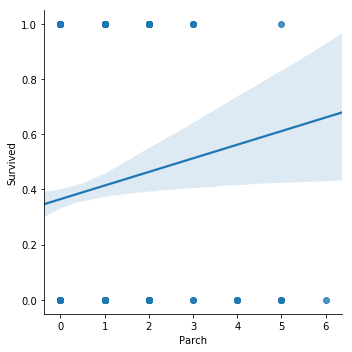

In [196]:
sns.lmplot('Parch', 'Survived', data=titanic_df, palette='autumn')

# Having more childen onboard significantly imporved chances of survival

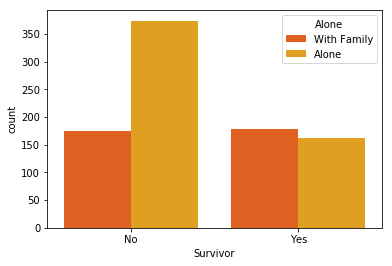

In [159]:
sns.countplot('Survivor', data=titanic_df, hue='Alone', palette='autumn')

In [162]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


In [200]:
titanic_ndf = titanic_df.dropna()

In [201]:
titanic_ndf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,Yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,Yes
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,male,Alone,Yes
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,male,Alone,Yes
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,male,With Family,No
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,female,With Family,Yes
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,male,With Family,No


In [207]:
def Deck(Cabin):
    
    if Cabin[0] == 'A':
        return 'A'
    elif Cabin[0] == 'B':
        return 'B'
    elif Cabin[0] == 'C':
        return 'C'
    elif Cabin[0] == 'D':
        return 'D'
    elif Cabin[0] == 'E':
        return 'E'
    elif Cabin[0] == 'F':
        return 'F'
    elif Cabin[0] == 'G':
        return 'G'
    else:
        return np.NaN
    
titanic_ndf['Deck'] = titanic_ndf['Cabin'].apply(Deck)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [208]:
titanic_ndf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,Yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,Yes,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,male,Alone,Yes,D
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,male,Alone,Yes,A
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,male,With Family,No,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,female,With Family,Yes,D
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,male,With Family,No,B


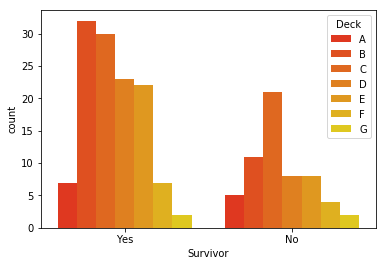

In [225]:
sns.countplot('Survivor', data=titanic_ndf, hue='Deck', palette='autumn', hue_order=['A','B','C','D','E','F','G'])

# People in lowest and hgher deck had less chances of survival